# CS211: Data Privacy
## Homework 3

In [51]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from unittest.mock import patch

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

adult = pd.read_csv('https://github.com/jnear/cs211-data-privacy/raw/master/homework/adult_with_pii.csv')
adult = adult.dropna()

In [52]:
adult.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Question 1 (10 points)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult_data` dataframe to contain only participants who were never married, then return the  `len` of the filtered dataframe.

In [53]:
def query1():
    return adult[adult['Marital Status'] == 'Never-married'].shape[0]

query1()

9726

In [54]:
# TEST CASE for question 1
assert query1() == 9726

## Question 2 (5 points)

In 2-5 sentences, answer the following:
- What is the sensitivity of `query1`, and why?

The sensitivity of query1, is 1 since it is a counting query. This is because there is not a range of numbers involved in the query, but yet a simple count of those individuals who are married or not. Hence if we are looking for a certain row, the total count will either not change or at most change by 1.

## Question 3 (10 points)

Use the implementation of `laplace_mech` to produce a differentially private answer to `query1`, with `epsilon = 0.1`.

In [55]:
def dp_query1(epsilon):
    return laplace_mech(query1(), 1, epsilon)

dp_query1(0.1)

9725.36587360775

In [56]:
# TEST CASE for question 3
dp_results = [dp_query1(0.1) for _ in range(100)]
spec = [np.random.laplace(loc=9726, scale=1/0.1) for _ in range(100)]
assert stats.wasserstein_distance(dp_results, spec) < 10

## Question 4 (10 points)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Implement a function `graph_error1` that:

- Calculates 1000 differentially private answers to `dp_query1`
- Calculates the percent error for each one of these answers against the original (non-private) answer
- Graphs the distribution of errors using a histogram

*Hint*: use `plt.hist(..., bins=20)`.

The given code will use your function to plot errors for `epsilon=0.1` and `epsilon=1.0`.

In [57]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

(array([246., 181., 136., 136.,  84.,  70.,  54.,  24.,  29.,  12.,  10.,
          5.,   2.,   8.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([1.68384309e-06, 5.04646094e-03, 1.00912380e-02, 1.51360151e-02,
        2.01807922e-02, 2.52255693e-02, 3.02703464e-02, 3.53151236e-02,
        4.03599007e-02, 4.54046778e-02, 5.04494549e-02, 5.54942320e-02,
        6.05390091e-02, 6.55837862e-02, 7.06285633e-02, 7.56733404e-02,
        8.07181175e-02, 8.57628946e-02, 9.08076717e-02, 9.58524488e-02,
        1.00897226e-01]),
 <BarContainer object of 20 artists>)

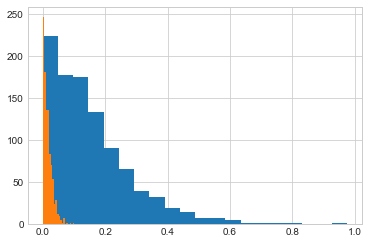

In [58]:
def graph_error1(epsilon):
    return plt.hist([pct_error(query1(), laplace_mech(dp_query1(epsilon), 1, epsilon)) for _ in range(1000)], bins=20)

graph_error1(0.1)
graph_error1(1.0)

In [59]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / query1()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error1(1.0)
    
args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.001

AssertionError: 

## Question 5 (10 points)

In 2-5 sentences, answer the following:

- How does the histogram of relative errors for $\epsilon = 0.1$ differ from the one for $\epsilon = 1.0$?
- What do the two histograms tell you about the effect of $\epsilon$ on relative error?

**HINT**: Pay close attention to which color represents which value of $\epsilon$!

The histograms differ through the small epsilon having a condensed and overall thiner set of error values whereas big epsilon is much more of a range across error values. This shows that choosing a larger epsilon has a greater effect on the relative error of the query while smaller epsilon is more than likley have less percent error. 

## Question 6 (10 points)

Consider `query2`, which asks how many people in the dataset are over the age of 60.

In [ ]:
def query2():
    return len(adult[adult['Age'] > 60])

Implement `dp_query2`, a differentially private version of `query2` (as in question 3), and `graph_error2`, which graphs relative error for `dp_query2` (as in question 4).

In [ ]:
def dp_query2(epsilon):
    return laplace_mech(query2(), 1, epsilon)

def graph_error2(epsilon):
    return plt.hist([pct_error(query2(), laplace_mech(dp_query2(epsilon), 1, epsilon)) for _ in range(1000)], bins=20)

graph_error2(1.0)
graph_error1(1.0) # we plot both errors for query 1 and query 2 at the same epsilon, to compare

In [ ]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / query2()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error2(1.0)
    
args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.01

## Question 7 (10 points)

In 2-5 sentences, answer the following:

- Given the graph from question 6, how does relative error differ between `dp_query1` and `dp_query2` for the same value of $\epsilon$?
- What property of the query causes the difference in relative errors between `dp_query1` and `dp_query2`?

The relative error differs between dp_query1 and dp_query2 for the same value of epsilon because the size of the data is different thus the amount of privacy needed will also differ... For the second query the set of results is only including individuals over 60. The property that causes this disparity between the two is sequential composition, since the same query is processed many times and the total privacy is summated. 